In [ ]:
!pip install pyvi
!pip install pytorch
!pip install underthesea
!pip install keras
!pip install pandas
!pip install gensim

import pyvi
import nltk
from underthesea import word_tokenize
from tensorflow import keras
from __future__ import print_function
from keras.models import Model
from keras.layers import Input, LSTM, Dense
import numpy as np
import io
from pickle import load
import warnings
import pandas as pd
warnings.filterwarnings("ignore")


  Using cached https://files.pythonhosted.org/packages/ee/67/f403d4ae6e9cd74b546ee88cccdb29b8415a9c1b3d80aebeb20c9ea91d96/pytorch-1.0.2.tar.gz
  ERROR: Failed building wheel for pytorch
  Running setup.py clean for pytorch
Failed to build pytorch
    Running setup.py install for pytorch ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-ffce9_n_/pytorch/setup.py'"'"'; __file__='"'"'/tmp/pip-install-ffce9_n_/pytorch/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-tabf8n0p/install-record.txt --single-version-externally-managed --compile Check the logs for full command output.


In [ ]:
import os
import pandas as pd
from __future__ import print_function
import gensim
from gensim import *
from gensim.models import Word2Vec
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
from keras.models import Model
from keras.layers import Input, LSTM, Dense

In [ ]:
from google.colab import drive
drive.mount("/dataset", force_remount=True)

Mounted at /dataset


In [ ]:
import sys
import os

import importlib.util
spec = importlib.util.spec_from_file_location("attentionn.py", "/dataset/MyDrive/Colab Notebooks/attentionn.py")
foo = importlib.util.module_from_spec(spec)
spec.loader.exec_module(foo)
foo.AttentionLayer

attentionn.py.AttentionLayer

In [ ]:
stopword = open('/dataset/MyDrive/vietnamese_stopword.txt', 'r')
stopword = stopword.read()

In [ ]:
#pre-processing - document
# nltk.download('punkt') 
def pre_processing(data, remove_stopwords=True):
  data = data.lower()
  data = data.replace('\n', '. ')
  data = data.strip()
  data = word_tokenize(data)
  if remove_stopwords:
    data = [i for i in data if not i in stopword]
  data = " ".join(data)
  return data

In [ ]:
from pathlib import Path
import pandas as pd

path1 = ['/dataset/MyDrive/donvanban/Plaintext/Chinh tri','/dataset/MyDrive/donvanban/Plaintext/Van Hoa','/dataset/MyDrive/donvanban/Plaintext/Xa Hoi','/dataset/MyDrive/donvanban/Plaintext/boKHCN','/dataset/MyDrive/donvanban/Plaintext/khoahoc_giaoduc','/dataset/MyDrive/donvanban/Plaintext/kinhte']
path2 = ['/dataset/MyDrive/donvanban/Summary_manual/Chinh Tri','/dataset/MyDrive/donvanban/Summary_manual/Van Hoa','/dataset/MyDrive/donvanban/Summary_manual/Xa Hoi','/dataset/MyDrive/donvanban/Summary_manual/boKHCN','/dataset/MyDrive/donvanban/Summary_manual/khoahoc_giaoduc','/dataset/MyDrive/donvanban/Summary_manual/kinhte']

DataFrame = []
SumFrame= []
for i in path1:
  entries =sorted(os.listdir(i))
  for a in entries:
    #make path
    newPath = i + '/'+ a
    e_entries = Path(newPath)
    #read each path 
    with open(e_entries, 'r',encoding='utf-8', errors='ignore') as f:
      data = pre_processing(f.read(),True)
      DataFrame.append({'Text': [data]})

df = pd.DataFrame(DataFrame)#

for i in path2:
  entries = sorted(os.listdir(i))
  for a in entries:
    #make path
    newPath = i + '/'+ a
    e_entries = Path(newPath)
    #read each path 
    with open(e_entries, 'r',encoding='utf-8', errors='ignore') as f:
      Sumary = pre_processing(f.read(),False)
      SumFrame.append([Sumary])
df['Sumary'] = SumFrame
print(df)

                                                                                                                                                                                                        Text                                                                                                                                                                                                   Sumary
0    [﻿ ưu tiên việt nam xây điện hạt nhân . . 11/4 , đại sứ liên bang việt nam andrey kovtun đoàn công tác thăm làm việc tỉnh ninh thuận tình hình triển khai xây dựng nhà máy điện hạt nhân ninh thuận ...  [ngày 11/4 , đại sứ liên bang nga tại việt nam andrey kovtun cùng đoàn công tác đã thăm và làm việc với tỉnh ninh thuận về tình hình triển khai xây dựng nhà máy điện hạt nhân ninh thuận .. phía ng...
1    [﻿ việt nam-philippines cam kết phối hợp giải quyết tranh chấp biển đông . nhận lời mời bộ trưởng ngoại giao philippines albert f . del rosario , hai 31/7 1/8 , bộ trưởng ngoại giao p

In [ ]:
for i in range(5):
    print("Review:",df['Text'][i])
    print("Summary:",df['Sumary'][i])
    print("\n")

Review: ['\ufeff ưu tiên việt nam xây điện hạt nhân . . 11/4 , đại sứ liên bang việt nam andrey kovtun đoàn công tác thăm làm việc tỉnh ninh thuận tình hình triển khai xây dựng nhà máy điện hạt nhân ninh thuận .. làm việc , chủ tịch ủy ban nhân dân tỉnh ninh thuận nguyễn đức tỉnh hoàn chỉnh chính sách , cơ chế đặc thù thủ tướng chính phủ phê duyệt . tỉnh hoàn thành công tác đo đạc bản đồ thu hồi khu vực triển khai dự án khu vực thu hồi xây dựng nhà máy , khu tái định cư , khu nghĩa trang hệ thống phục vụ khu tái định cư nhà máy điện hạt nhân ninh thuận 1 ; hoàn thành công tác kiểm kê khu vực lõi nhà máy .. tỉnh hoàn thành khảo sát đo đạc địa hình , địa chất phục vụ công tác lập quy hoạch dự án đầu tư ; hoàn thành công tác lập quy hoạch chi tiết khu tái định cư nhà máy 1 diện tích 86,9 khu nghĩa trang diện tích 10,8 .. tỉnh thành lập ban quản lý dự án điện hạt nhân dự án di dân , tái định cư ủy ban nhân dân tỉnh làm chủ đầu tư . , tỉnh phấn đấu hoàn thành công tác bồi thường , giải phón

In [ ]:
df=pd.read_csv("/dataset/MyDrive/donvanban/alo.csv")
df = df.drop([df.index[18], df.index[34],df.index[35],df.index[36]])
df['Sumary'] = df['Sumary'].apply(lambda x : '_START_ '+ x + ' _END_')
print(df)

                                                                                                                                                                                                        Text                                                                                                                                                                                                   Sumary
0    ['\ufeff ưu tiên việt nam xây điện hạt nhân . . 11/4 , đại sứ liên bang việt nam andrey kovtun đoàn công tác thăm làm việc tỉnh ninh thuận tình hình triển khai xây dựng nhà máy điện hạt nhân ninh ...  _START_ ['ngày 11/4 , đại sứ liên bang nga tại việt nam andrey kovtun cùng đoàn công tác đã thăm và làm việc với tỉnh ninh thuận về tình hình triển khai xây dựng nhà máy điện hạt nhân ninh thuận ....
1    ['\ufeff việt nam-philippines cam kết phối hợp giải quyết tranh chấp biển đông . nhận lời mời bộ trưởng ngoại giao philippines albert f . del rosario , hai 31/7 1/8 , bộ trưởng ngoại 

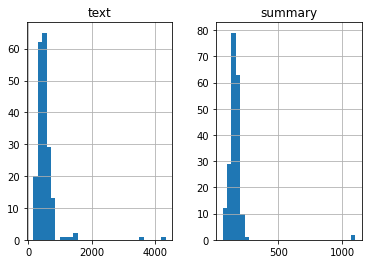

In [ ]:
import matplotlib.pyplot as plt
text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in df['Text']:
      text_word_count.append(len(i.split()))

for i in df['Sumary']:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})
length_df.hist(bins = 30)
plt.show()

In [ ]:
max_len_text=300
max_len_summary=50
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(df['Text'],df['Sumary'],test_size=0.1,random_state=0,shuffle=True) 

In [ ]:
x_tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\]^`{|}~ ')
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences
x_tr    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr,  maxlen=max_len_text, padding='post') 
x_val   =   pad_sequences(x_val, maxlen=max_len_text, padding='post')

x_voc_size   =  len(x_tokenizer.word_index) +1
print(x_voc_size)

3635


In [ ]:
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(y_tr))

#convert summary sequences into integer sequences
y_tr    =   y_tokenizer.texts_to_sequences(y_tr) 
y_val   =   y_tokenizer.texts_to_sequences(y_val) 

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr, maxlen=max_len_summary, padding='post')
y_val   =   pad_sequences(y_val, maxlen=max_len_summary, padding='post')

y_voc_size  =   len(y_tokenizer.word_index) +1
print(y_voc_size)

2033


In [ ]:
from keras import backend as K 
K.clear_session() 
latent_dim = 512

# Encoder 
encoder_inputs = Input(shape=(max_len_text,)) 
enc_emb = Embedding(x_voc_size, latent_dim,trainable=True)(encoder_inputs) 

#LSTM 1 
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True) 
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb) 

#LSTM 2 
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True) 
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1) 

#LSTM 3 
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True) 
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2) 

# Set up the decoder. 
decoder_inputs = Input(shape=(None,)) 
dec_emb_layer = Embedding(y_voc_size, latent_dim,trainable=True) 
dec_emb = dec_emb_layer(decoder_inputs) 

#LSTM using encoder_states as initial state
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True) 
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

attn_layer = foo.AttentionLayer(name='attention_layer') 
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs]) 
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])
decoder_dense = TimeDistributed(Dense(y_voc_size, activation='softmax')) 
decoder_outputs = decoder_dense(decoder_concat_input) 
model = Model([encoder_inputs, decoder_inputs], decoder_outputs) 
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 300)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 300, 512)     1861120     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 300, 512), ( 2099200     embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
______________________________________________________________________________________________

In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=50,batch_size=512,callbacks=[es], validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

Epoch 1/50
1/1 [==============================] - 10s 10s/step - loss: 6.9901 - val_loss: 7.3107
Epoch 2/50
1/1 [==============================] - 2s 2s/step - loss: 7.2516 - val_loss: 6.7903
Epoch 3/50
1/1 [==============================] - 2s 2s/step - loss: 6.6931 - val_loss: 6.6166
Epoch 4/50
1/1 [==============================] - 2s 2s/step - loss: 6.5258 - val_loss: 6.5496
Epoch 5/50
1/1 [==============================] - 2s 2s/step - loss: 6.4151 - val_loss: 6.5355
Epoch 6/50
1/1 [==============================] - 2s 2s/step - loss: 6.3692 - val_loss: 6.5256
Epoch 7/50
1/1 [==============================] - 2s 2s/step - loss: 6.3240 - val_loss: 6.5343
Epoch 00007: early stopping


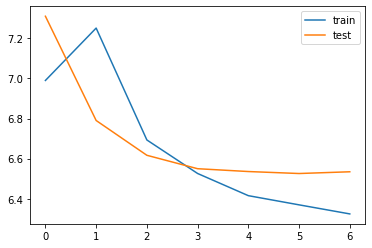

In [ ]:
from matplotlib import pyplot 

pyplot.plot(history.history['loss'], label='train') 
pyplot.plot(history.history['val_loss'], label='test') 
pyplot.legend()
pyplot.show()

In [ ]:
reverse_target_word_index=y_tokenizer.index_word
reverse_source_word_index=x_tokenizer.index_word 
target_word_index=y_tokenizer.word_index

In [ ]:
# encoder inference
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# decoder inference
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_len_text,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs)

# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

#attention inference
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_inf_concat)

# Final decoder model
decoder_model = Model(
[decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
[decoder_outputs2] + [state_h2, state_c2])

In [ ]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))

    # Chose the 'start' word as the first word of the target sequence
    target_seq[0, 0] = target_word_index['start']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]

        if(sampled_token!='end'):
            decoded_sentence += ' '+sampled_token

            # Exit condition: either hit max length or find stop word.
            if (sampled_token == 'end' or len(decoded_sentence.split()) >= (max_len_summary-1)):
                stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

In [ ]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
      if((i!=0 and i!=target_word_index['start']) and i!=target_word_index['end']):
        newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
      if(i!=0):
        newString=newString+reverse_source_word_index[i]+' '
    return newString

In [ ]:
for i in range(len(x_val)):
  print("Review:",seq2text(x_val[i]))
  print("Original summary:",seq2summary(y_val[i]))
  print("Predicted summary:",decode_sequence(x_val[i].reshape(1,max_len_text)))
  print("\n")

Review: hành chính sách trọng dụng nhân tài nhân tài thành tích xuất sắc học tập công tác lao động bao gồm thủ khoa xuất sắc tiến sĩ bác sĩ giáo viên giảng viên huấn luyện viên chuyên gia nhà khoa học ngành nghệ nhân thành phố áp dụng chính sách ưu đãi tuyển dụng đãi ngộ tiếp nhận xét đặc cách thi tuyển hưởng đãi ngộ thu hút 20 lương tối thiểu hai công tác ưu tiên cử đào tạo sau đại học nước ngoài thành phố kinh phí chuyên gia giỏi nhà khoa học ngành nghệ nhân phương tiện đi lại làm việc nghiên cứu thù lao hợp đồng thỏa thuận cơ sở số lượng chất lượng hiệu quả công việc tiếp nhận tuyển dụng đặc cách nghĩa vụ trách nhiệm quy định cán bộ công chức viên chức cam kết làm việc cơ quan thành phố hà nội 7 cử đào tạo bồi dưỡng cam kết phục vụ đào tạo bồi dưỡng chiều 2 7 hđnd thông qua nghị quyết thẩm quyền thủ tục tặng danh hiệu công dân danh dự thủ đô danh hiệu áp dụng nước ngoài trao tặng đóng góp xuất sắc sự nghiệp xây dựng phát triển thủ đô mở rộng tăng cường đoàn kết hữu nghị quan hệ hợp 

KeyboardInterrupt: ignored